In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# TRAINING DATA [Wiki] (100)
# 3,523,019 tokens
# 188,627 vocab items
# 18.7 tokens/vocab

# TRAINING DATA [Gutenberg] (100)
# 4,777,675 tokens
# 143,410 vocab items
# 33.3 tokens/vocab

file={
#     "ordered_train(100_i)_test(100_i)_a0.1": ['LM_n3_(DUTCH_small)_a0.1_OI_train(100)_test(100).txt'],
#     "ordered_train(100_i)_test(100_i)_a0": ['LM_n3_(DUTCH_small)_a0_OI_train(100)_test(100).txt'],
    "ordered_train(90_i)_test(10_i)_a0.1": ['LM_n3_(DUTCH_small)_a0.1_OI_train(90)_test(10).txt'],
    "ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01": ['LM_n3_(DUTCH_gutenberg)_a0.01_OI_train(90)_test(10).txt'],
    "random_(gutenberg)_train(90_o)_test(10_i)_a0.01": ['LM_n3_(DUTCH_gutenberg)_a0.01_R_train(90_o)_test(10_i).txt'],
#     "ordered_(gutenberg)_train(90_i)_test(10_i)_a0.1": ['LM_n3_(DUTCH_gutenberg)_a0.1_OI_train(90)_test(10).txt'],
#     "ordered_(gutenberg)_train(90_i)_test(10_i)_a0.5": ['LM_n3_(DUTCH_gutenberg)_a0.5_OI_train(90)_test(10).txt'],
#     "random_train(90_o)_test(10_i)_a0.1": ['LM_n3_(DUTCH_small)_a0.1_R_train(90_o)_test(10_i).txt'],
    "ordered_gutenberg_a0.01": ['LM_n3_(DUTCH_gutenberg)_a0.01_OI_train(90)_test(10)(1).txt'],
    "ordered_gutenberg_a0.001": ['LM_n3_(DUTCH_gutenberg)_a0.001_OI_train(90)_test(10).txt'],
    "random_gutenberg_a0.001": ["LM_n3_(DUTCH_gutenberg)_a0.001_R_train(90_o)_test(10_i).txt"]
    
}

df_all = pd.DataFrame(columns=['name','window_size', 'perplexity','h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference','zeros_permutations'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
    if k[len(k)-2:len(k)-1] == str(4):
        df['word_count'] = pd.Series([576673,576673,576673,576673,576673])
    elif k[len(k)-3:len(k)-1] == str(10):
        df['word_count'] = pd.Series([1313930,1313930,1313930,1313930,1313930])
    elif k[len(k)-3:len(k)-1] == str(50):
        df['word_count'] = pd.Series([6407228,6407228,6407228,6407228,6407228])
    else:
        df['word_count'] = pd.Series([0,0,0,0,0])
    
    df['prob_words'] = pd.Series(2**(-df['h_words']))
    df['window_size'] =  pd.Series([1,2,3,4,5])
    df['name'] = pd.Series([k,k,k,k,k])
    df['h_wordorder'] = pd.Series(df['h_words'] - df['h_wordset'])
    df['entropy_rate'] = pd.Series(df['h_words'] / df['window_size'])
    df['perplexity'] = pd.Series(2**df['entropy_rate'])
    df['unordered_entropy_rate'] = pd.Series(df['h_wordset'] / df['window_size'])
    df['entropy_rate_difference'] = pd.Series((df['h_words'] - df['h_wordset']) / df['window_size'])
#     df['perplexity'] = pd.Series(df['prob_words']**(-1/df['word_count']))
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
#     if c == 0:
#         print(df)
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all


,name,window_size,perplexity,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference,zeros_permutations
0,ordered_train(90_i)_test(10_i)_a0.1,1,322.303800,8.332277,8.332277,0.000000,8.332277,8.332277,0.000000,NaN
1,ordered_train(90_i)_test(10_i)_a0.1,2,403.005126,17.309309,15.807799,1.501509,8.654654,7.903900,0.750755,NaN
2,ordered_train(90_i)_test(10_i)_a0.1,3,706.381136,28.392909,24.073456,4.319453,9.464303,8.024485,1.439818,NaN
3,ordered_train(90_i)_test(10_i)_a0.1,4,951.784033,39.577962,32.877380,6.700581,9.894490,8.219345,1.675145,NaN
4,ordered_train(90_i)_test(10_i)_a0.1,5,1137.852691,50.760490,41.903680,8.856811,10.152098,8.380736,1.771362,NaN
5,ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01,1,309.024917,8.271579,8.271579,0.000000,8.271579,8.271579,0.000000,NaN
6,ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01,2,144.392531,14.347705,14.039293,0.308411,7.173852,7.019647,0.154206,NaN
7,ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01,3,120.046978,20.722366,20.022527,0.699839,6.907455,6.674176,0.233280,NaN
8,ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01,4,110.210196,27.136456,26.242387,0.894068,6.784114,6.560597,0.223517,NaN
9,ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01,5,104.868002,33.562154,32.535363,1.026791,6.712431,6.507073,0.205358,NaN


[]

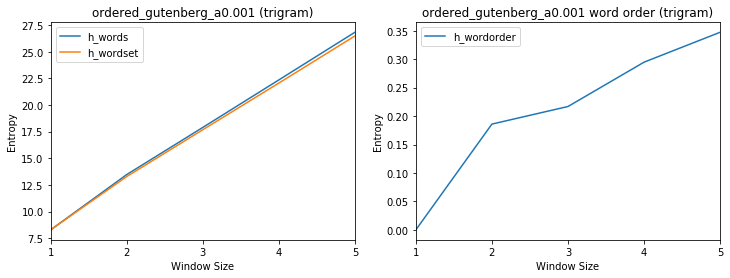

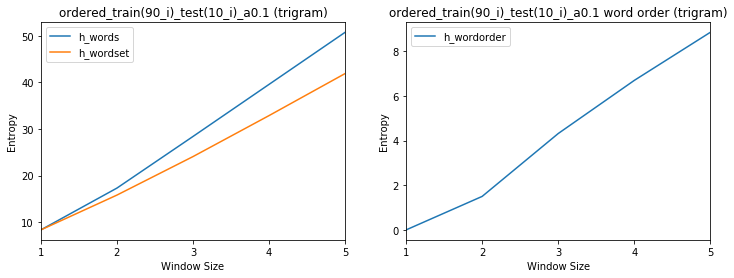

In [23]:
# Compare h_words/h_wordset and word order
name = "ordered_gutenberg_a0.001"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

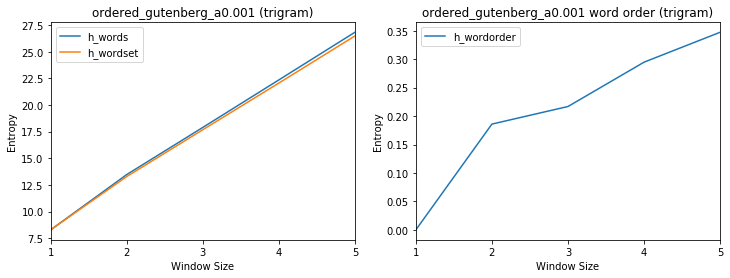

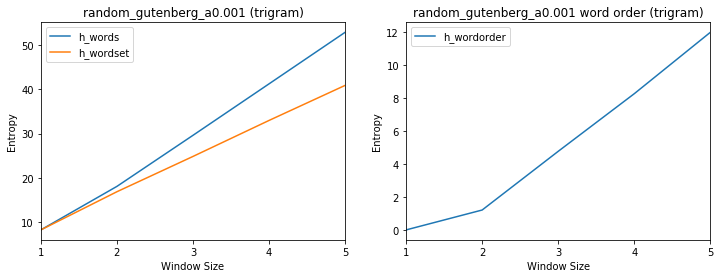

In [21]:
# Compare h_words/h_wordset and word order
name = "ordered_gutenberg_a0.001"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "random_gutenberg_a0.001"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

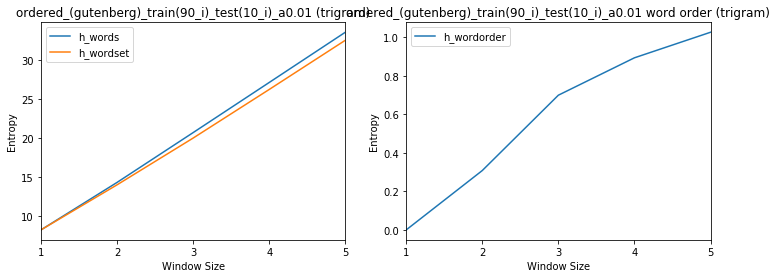

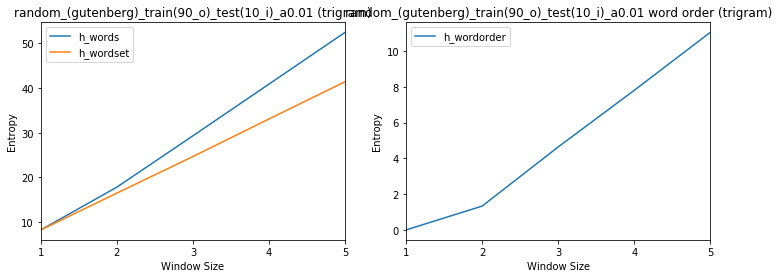

In [22]:

# Compare h_words/h_wordset and word order
name ="ordered_(gutenberg)_train(90_i)_test(10_i)_a0.01"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name ="random_(gutenberg)_train(90_o)_test(10_i)_a0.01"

df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

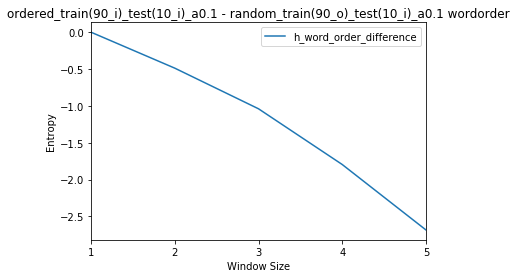

In [11]:
# Compare ordered and random wordorder difference

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = "ordered_train(90_i)_test(10_i)_a0.1"
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = "random_train(90_o)_test(10_i)_a0.1"
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

# df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

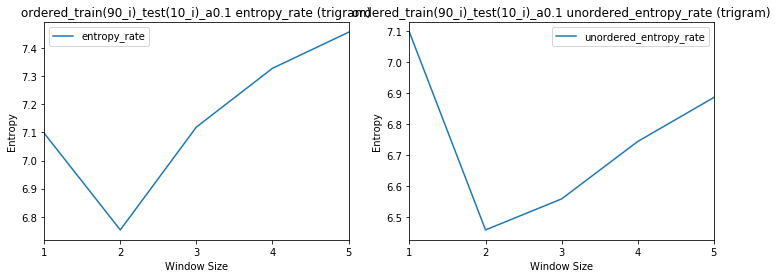

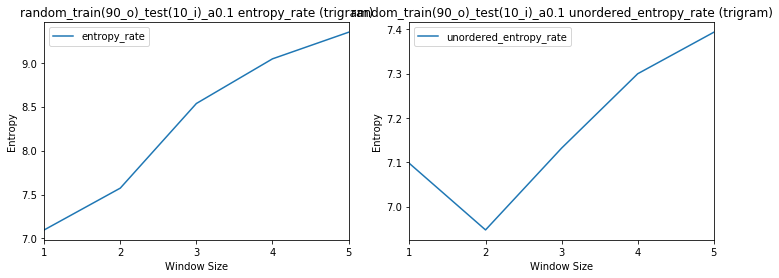

In [13]:
# Compare ordered and unordered entropy rates for random and ordered LM
# as window_size increases, on average there is more entropy per word (LESS INFORMATION)

base = 'i_a0.1_90_10'

name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = "random_train(90_o)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

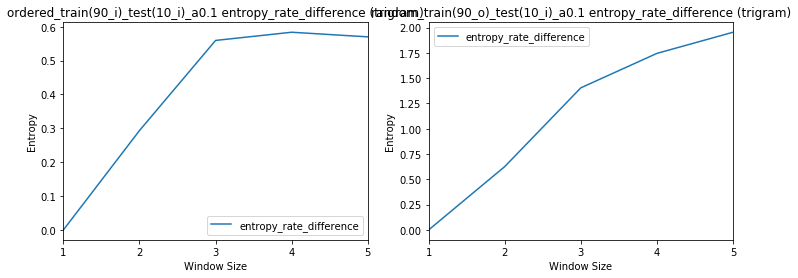

In [14]:
# Compare ordered and unordered entropy rates for random and ordered LM


name = "ordered_train(90_i)_test(10_i)_a0.1"
df = df_all[df_all['name'] == name].copy()

name2 = "random_train(90_o)_test(10_i)_a0.1"
df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

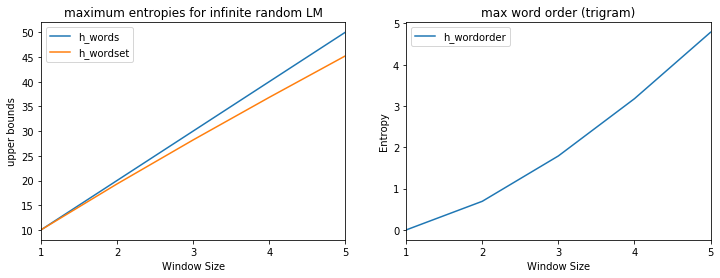

In [11]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()